<a href="https://colab.research.google.com/github/ShathaMelhem/AI/blob/main/Student_Performance_EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impotring Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/students-performance-in-exams")

print("Path to dataset files:", path)
# After downloading, you'll need to construct the full path to the CSV file
# using the downloaded path and the filename.


Path to dataset files: /kaggle/input/students-performance-in-exams


In [10]:
csv_file_path = os.path.join(path, 'exams.csv')

df = pd.read_csv(csv_file_path)


# Discovering Dataset

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [12]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,517,323,222,652,665,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.396000,69.002000,67.738000
std,NaN,NaN,NaN,NaN,NaN,15.402871,14.737272,15.600985
min,NaN,NaN,NaN,NaN,NaN,13.000000,27.000000,23.000000
25%,NaN,NaN,NaN,NaN,NaN,56.000000,60.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,66.500000,70.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.000000,79.000000


In [15]:
# Total number of missing values of each column

df_null=df.isnull().sum()
df_null[df_null>0]
 # no nulls


,0


In [16]:
# Total number of missing values
df_null_sum=df.isnull().sum().sum()
print("Total missing values:", df_null_sum)
#no missing values

Total missing values: 0


In [17]:
percent=df.isnull().mean()*100
print(percent[percent>0])

Series([], dtype: float64)


there are 1 duplicate that need to be cleared from dataset

In [18]:
duplicates=df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 1


1000 rows and 8 columns

In [20]:
df.shape

(1000, 8)

In [21]:
df.count()

,0
gender,1000
race/ethnicity,1000
parental level of education,1000
lunch,1000
test preparation course,1000
math score,1000
reading score,1000
writing score,1000


In [22]:
df['math score'].value_counts()

,count
math score,
63,34
77,30
71,30
74,28
57,27
...,...
13,2
23,1
29,1


# Seperate Numerical and Categorical Data

In [23]:
cat_col=df.select_dtypes(include=['object'])
cat_col


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,male,group A,high school,standard,completed
1,female,group D,some high school,free/reduced,none
2,male,group E,some college,free/reduced,none
3,male,group B,high school,standard,none
4,male,group E,associate's degree,standard,completed
...,...,...,...,...,...
995,male,group C,high school,standard,none
996,male,group D,associate's degree,free/reduced,completed
997,female,group C,some high school,free/reduced,none
998,female,group C,some college,standard,none


In [24]:
num_col=df.select_dtypes(include=['number'])
num_col

,math score,reading score,writing score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


# EDA

## Univariate analysis
to study each variable alone

histogram used to study the frequency distributions and the number of observations within each given numerical variable.

we have 3 num variables:
1.   math score,
2.   reading score,
3.   writting score.

my observations are:
1.    there  are outliers in all three variables and  distribution is  skewed to right .


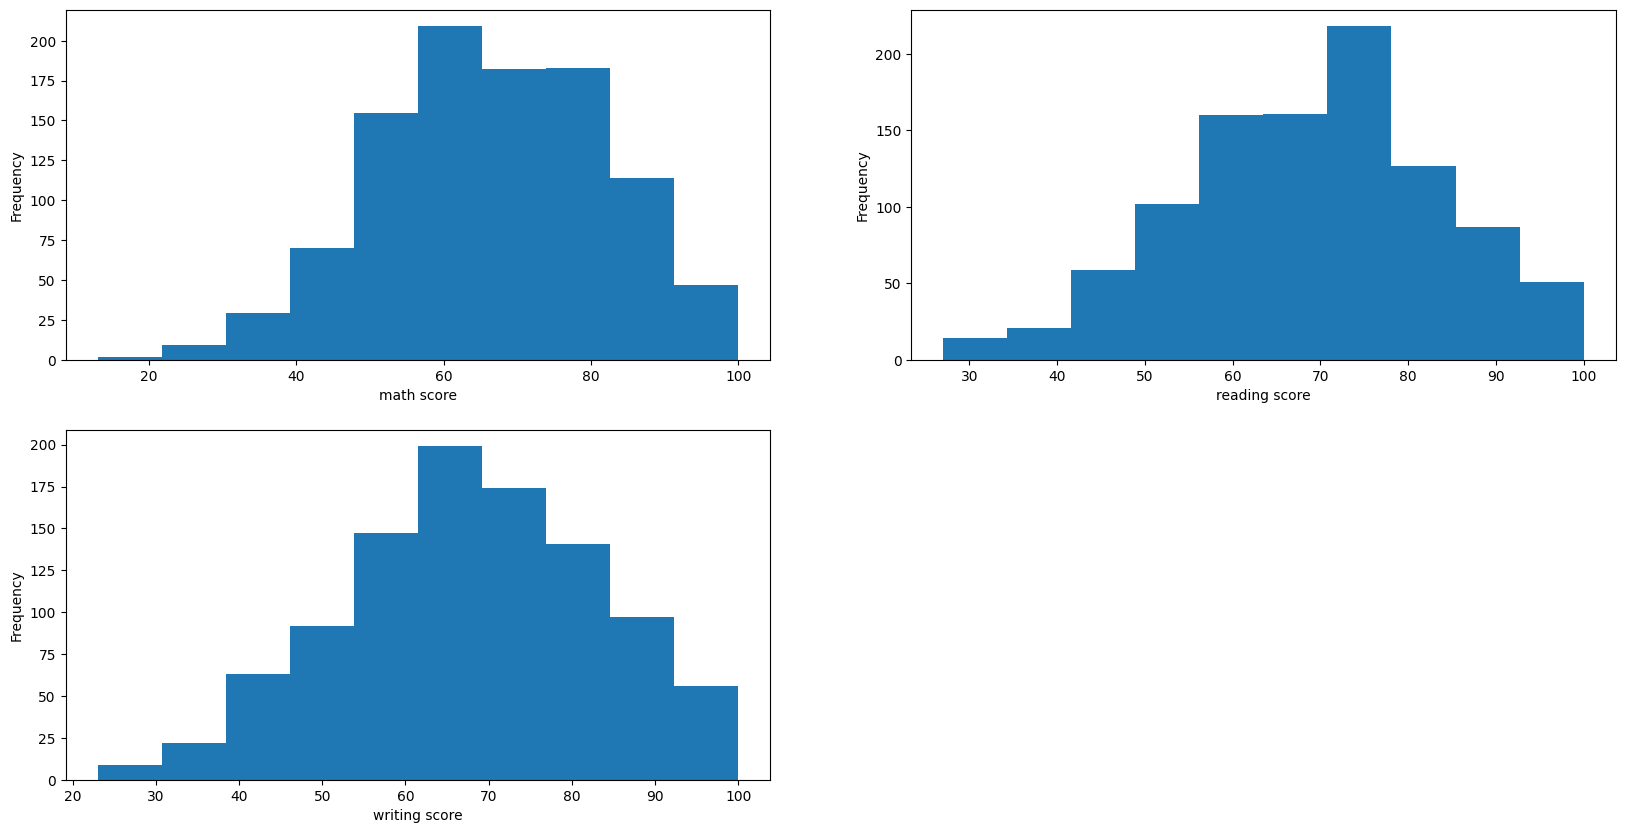

In [25]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    plt.hist(x= df[col])

    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
plt.show()

here, we plot histograms using seaborn lib   

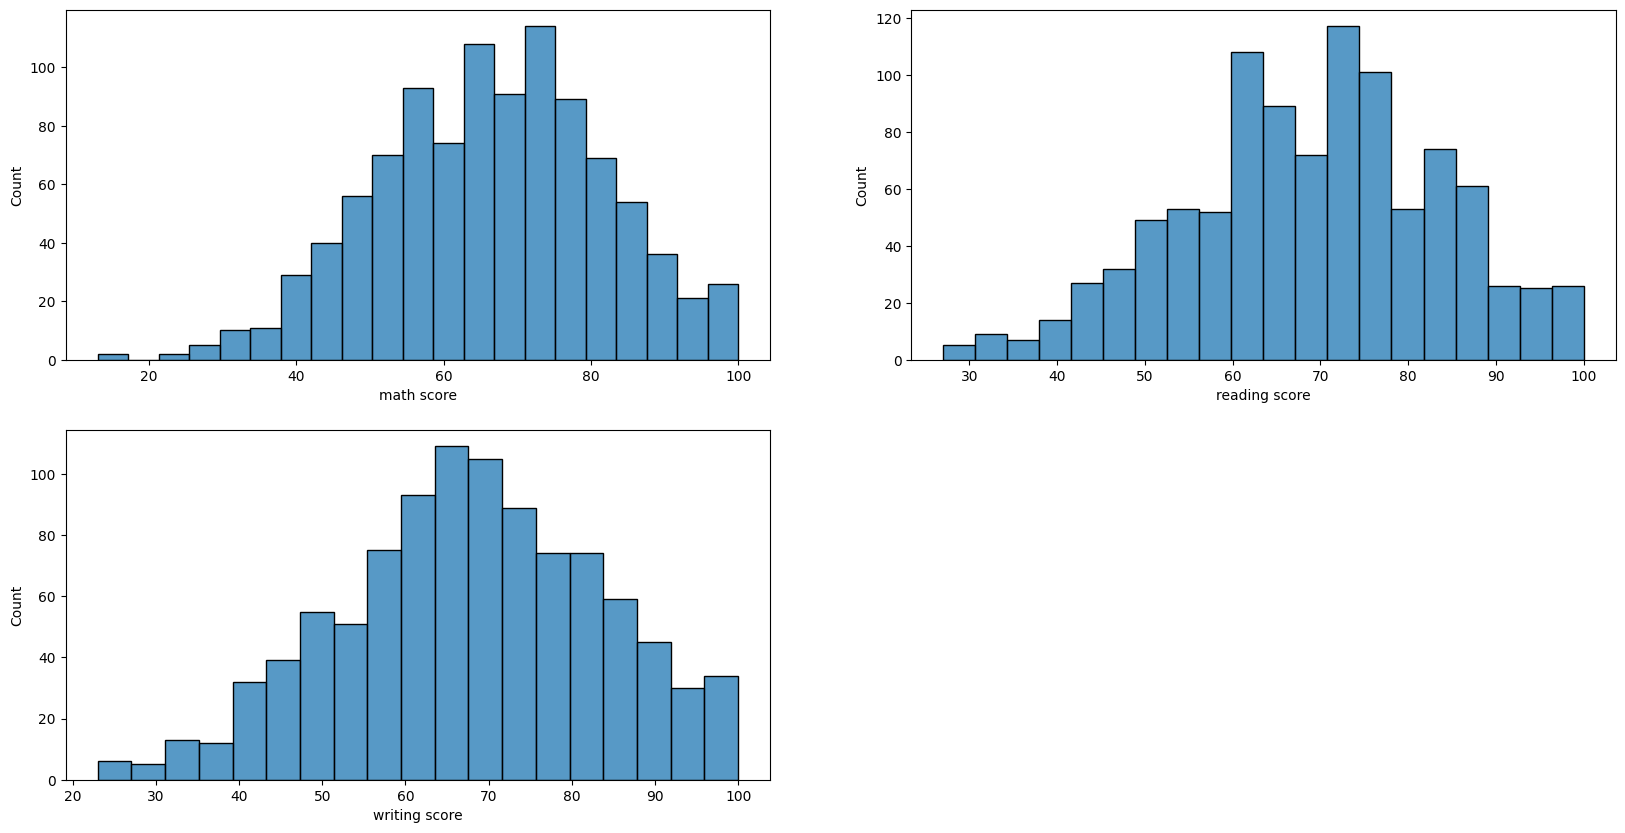

In [26]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.histplot(x= df[col])
plt.show()

<ipython-input-28-bb8da1857455>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], color='blue',shade=True)
<ipython-input-28-bb8da1857455>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], color='blue',shade=True)
<ipython-input-28-bb8da1857455>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], color='blue',shade=True)


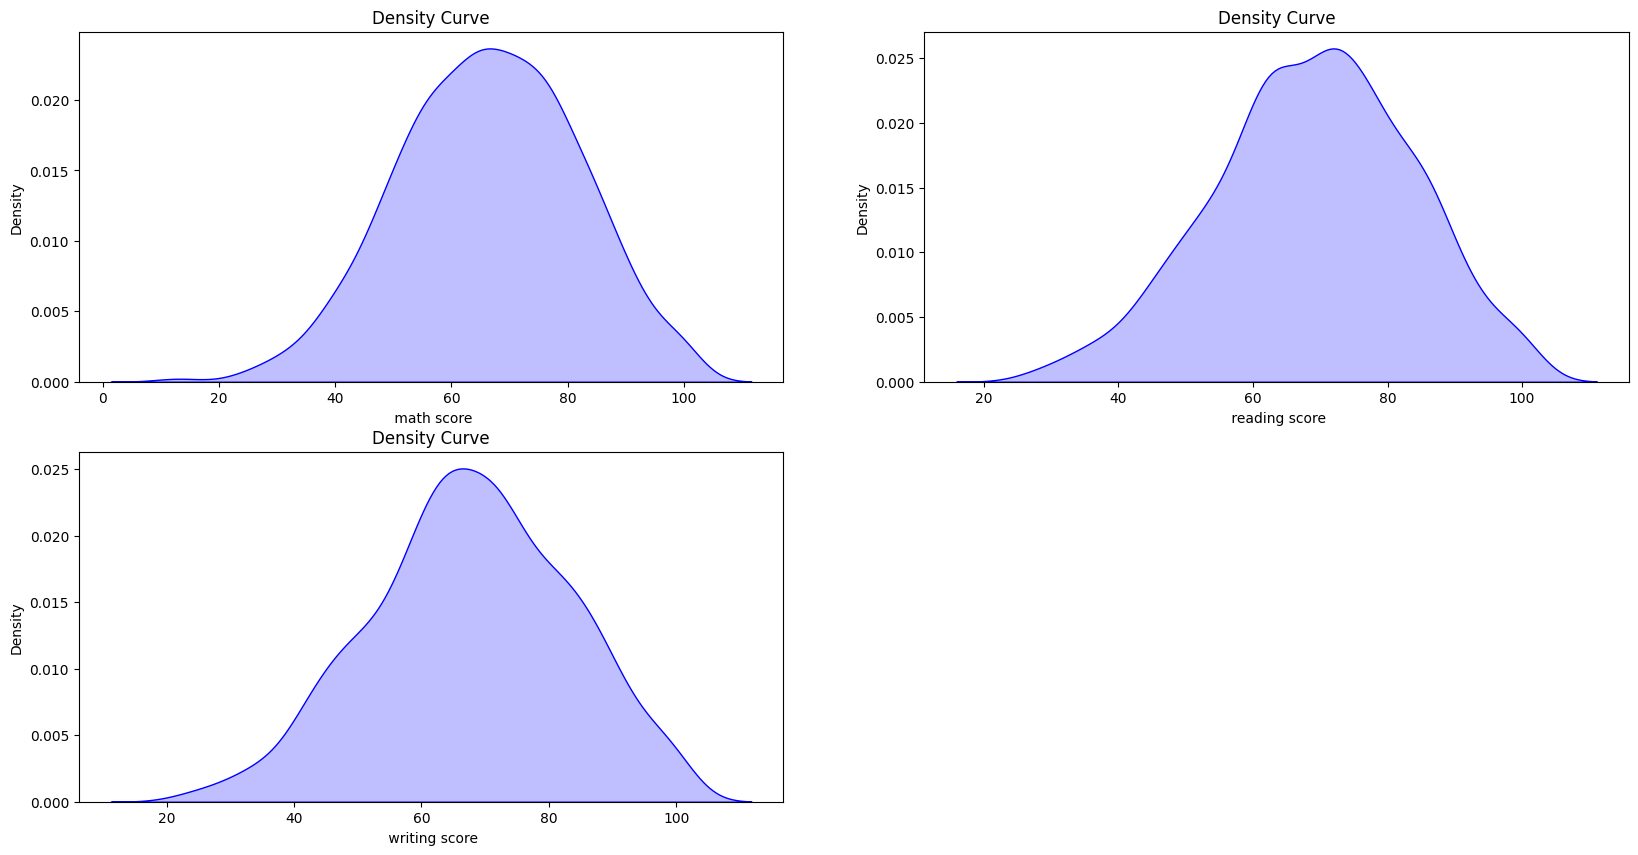

In [28]:
#Density curve (KDE):,numerical data ....continuous
plt.figure(figsize= (20, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.kdeplot(df[col], color='blue',shade=True)
    plt.title('Density Curve')
    plt.xlabel(f" {col}")
    plt.ylabel('Density')
plt.show()



box plot to study each num var each alone to discovre the outliers perfectly, hence the hist may not be clear enough to show them
***there are many outliers in all num vars***

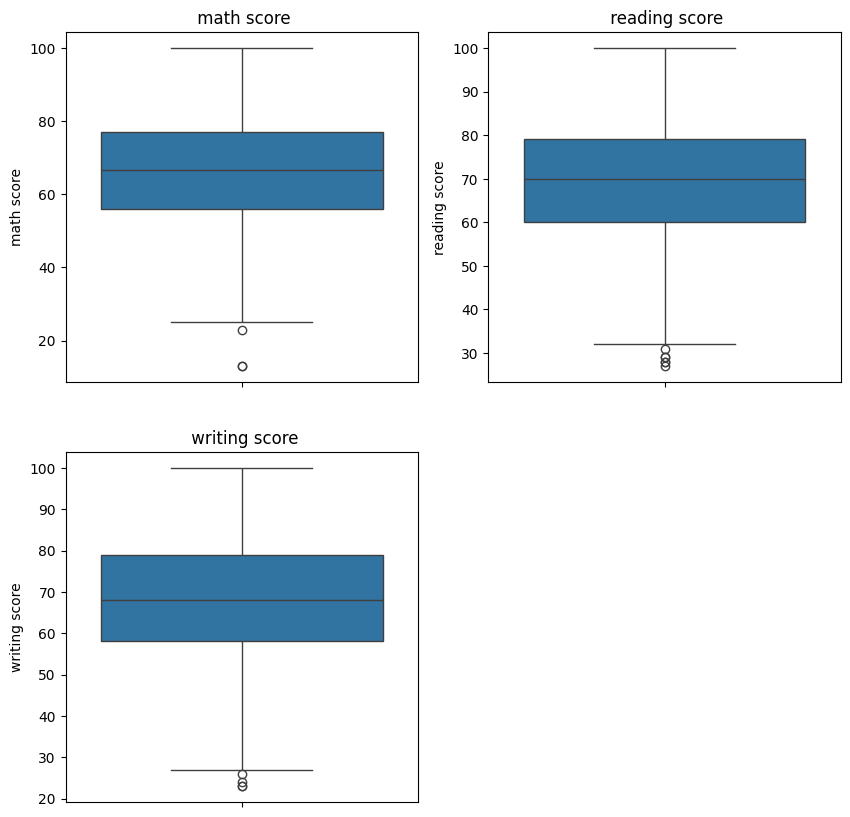

In [29]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.boxplot(data= df[col])
    plt.title(f" {col}")
plt.show()

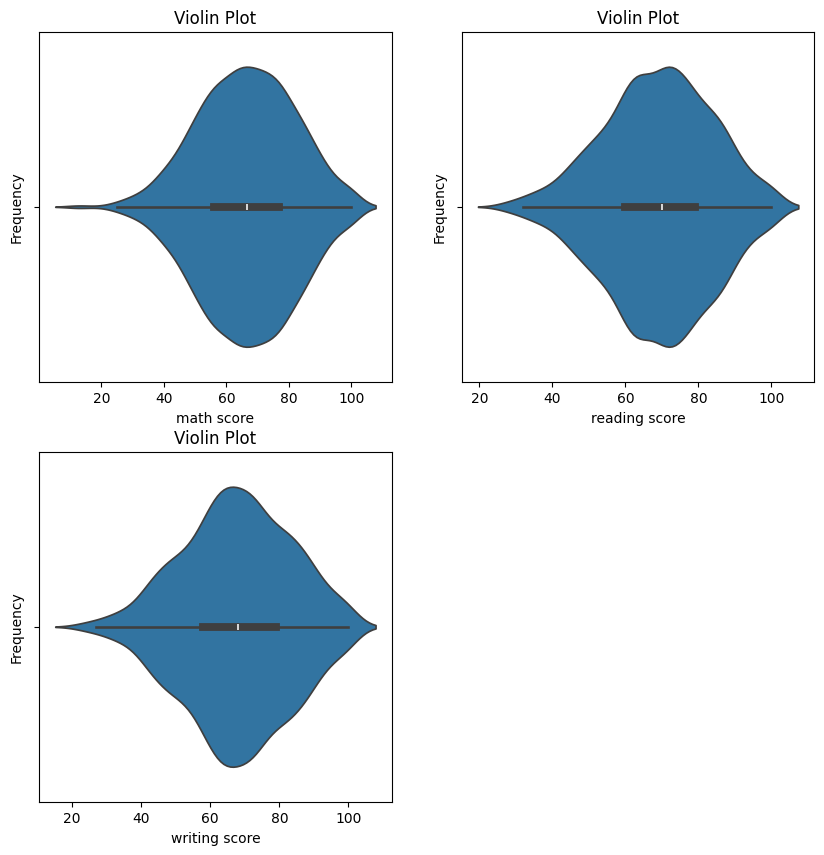

In [30]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.violinplot(x=df[col])
    plt.title('Violin Plot')
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
plt.show()

since we have 5 cat columns  so they need to be studied using bar plot to know the count of each category whithin each column or variable


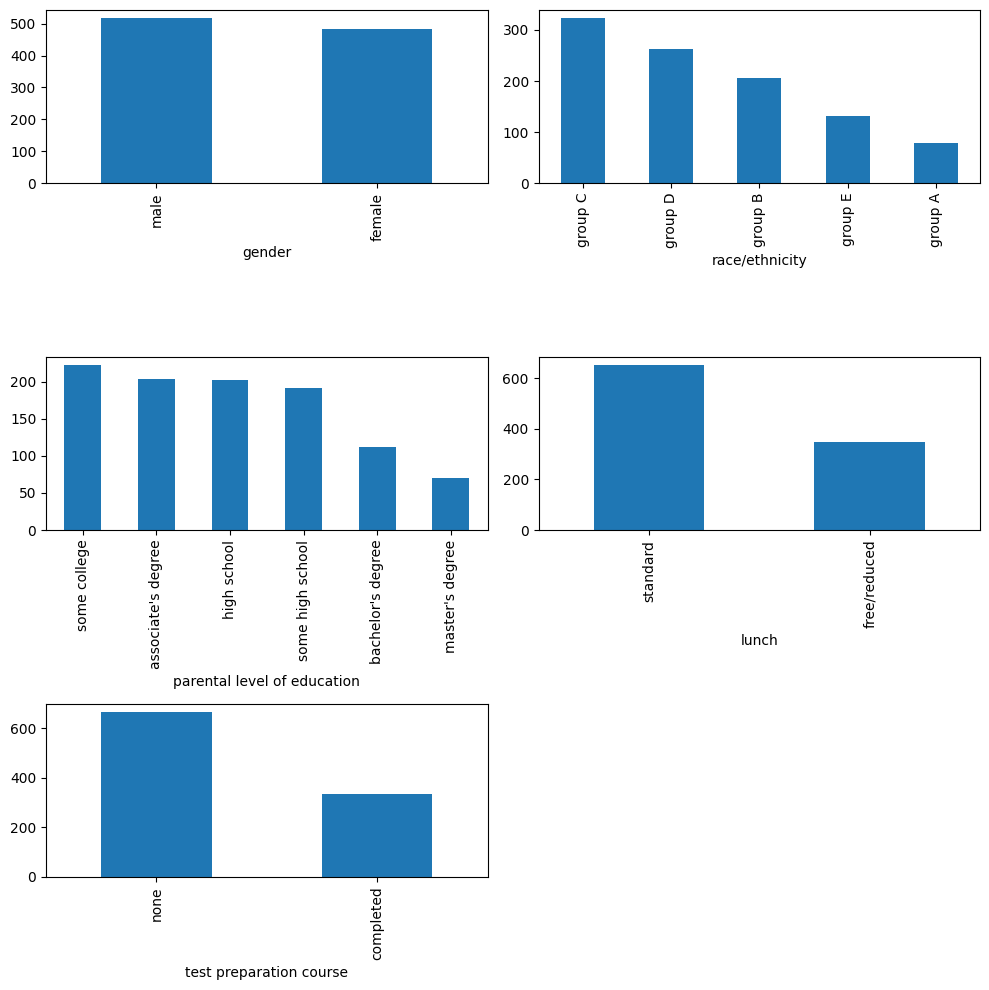

In [32]:
#bar plot :categorical data
plt.figure(figsize= (10, 10))
for i, col in enumerate(cat_col):
    # Changed subplot grid from (2, 2) to (3, 2) to accommodate 5 columns
    plt.subplot(3, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
plt.tight_layout() # Optional: Improves spacing between subplots
plt.show()

pie chart to define the percantage of each category
33.3% for each cat

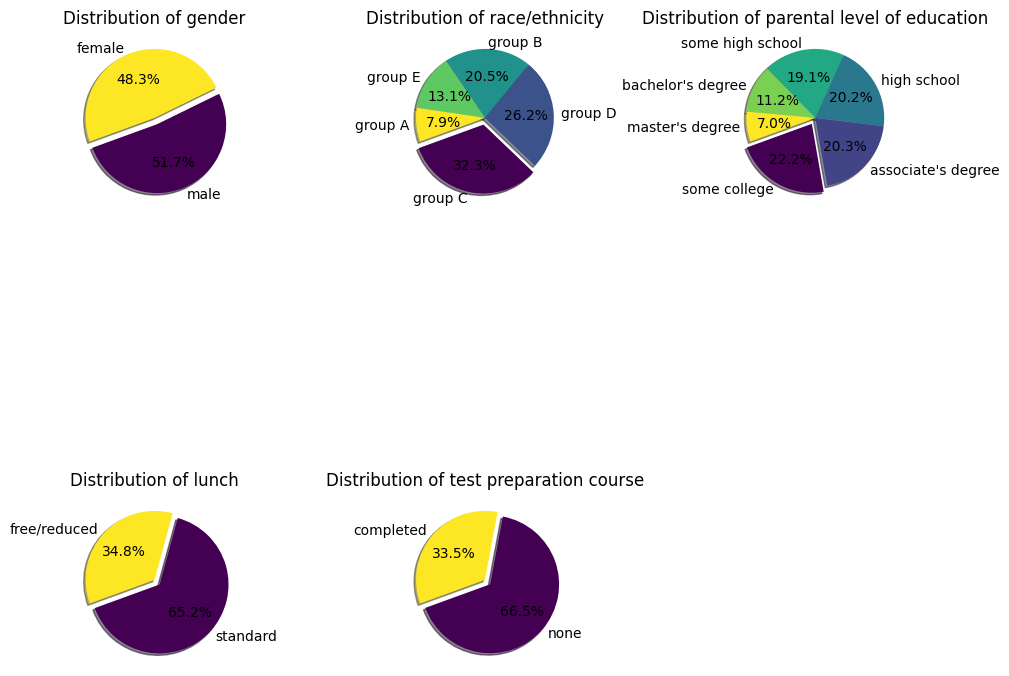

In [34]:
#pie chart :categorical data
plt.figure(figsize= (10, 10))

for i, col in enumerate(cat_col):
    plt.subplot(2, 3, i+ 1) # Adjusted subplot grid to (2, 3) to accommodate 5 columns
    # Dynamically create the explode tuple based on the number of unique values
    num_categories = len(df[col].value_counts())
    explode = [0.1] + [0] * (num_categories - 1) # Explode the first slice, the rest are not exploded

    # Dynamically create colors based on the number of unique values
    colors = plt.cm.viridis(np.linspace(0, 1, num_categories))

    plt.pie(df[col].value_counts(),
            labels=df[col].value_counts().index,
            colors=colors,
            explode=explode,
            autopct='%1.1f%%',
            shadow=True,
            startangle=200)
    plt.title(f'Distribution of {col}') # Add a title for each pie chart

plt.tight_layout() # Optional: Improves spacing between subplots
plt.show()

## Bivariate Analysis
to study each two vars with each other

scatter for num vs num

we can defined relationship between them as follows:

1.   reading wuth math have strong positive relationship
2.   writting with math strong positive relationship

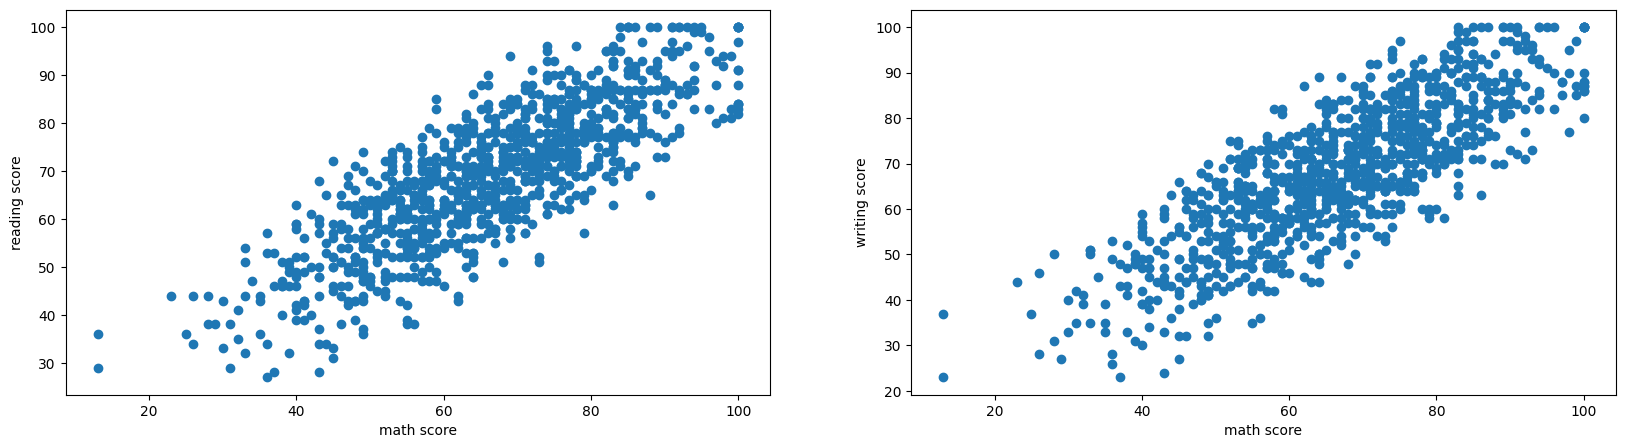

In [36]:
#scatter plot:num vs num
columns = list(num_col.columns) # Get the actual column names from the DataFrame
columns.remove('math score') # Remove 'math score' to plot it against the others


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['math score'], df[col], 'o') # Plot 'math score' on the x-axis
    ax[idx].set_xlabel('math score')
    ax[idx].set_ylabel(col)

plt.show()

we can defined relationship between them as follows:


1.  both are strong positive relationship

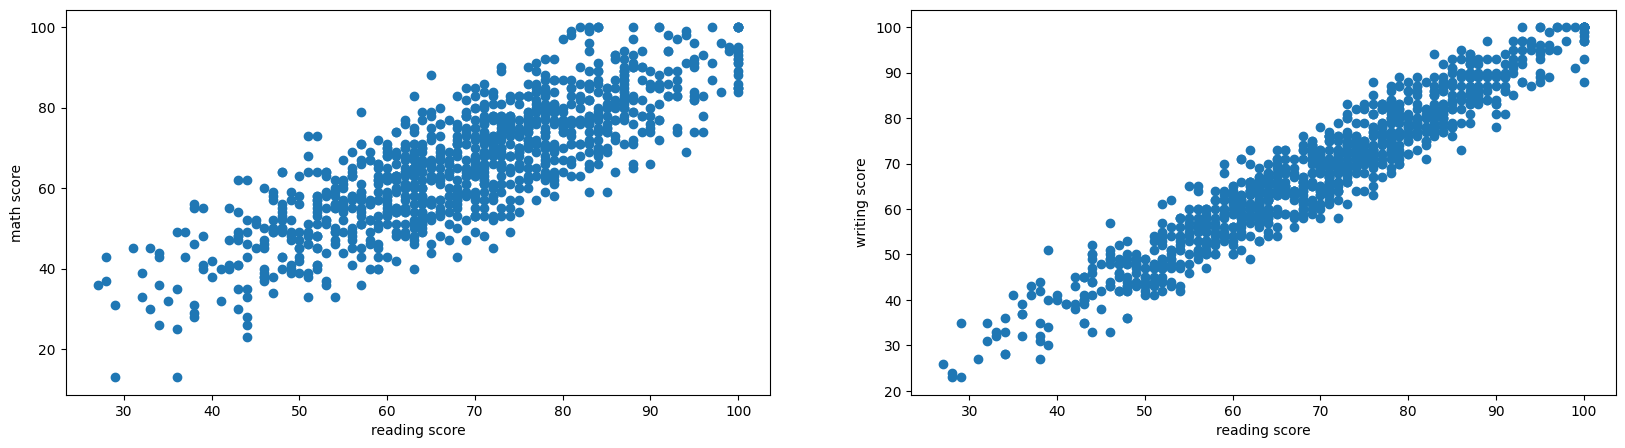

In [38]:
#scatter plot:num vs num
columns = list(num_col.columns) # Get the actual column names from the DataFrame

# Since we want to plot relationships between all numerical columns,
# we can use pairplot from seaborn which handles all combinations.
# Alternatively, if we want to recreate a specific scatter plot like
# 'sepal_width' vs others from the Iris dataset context, we need to
# choose a column from the *current* dataset to be the base for comparison.
# Let's assume the user intended to plot 'reading score' against the others as an example.

# To plot 'reading score' against other numerical columns:
base_column = 'reading score'
columns_to_plot = [col for col in columns if col != base_column] # Get other columns

fig, ax = plt.subplots(1, len(columns_to_plot), figsize = (20, 5))

for idx, col in enumerate(columns_to_plot, 0):
    # Plot the base column on the x-axis and the current column on the y-axis
    ax[idx].plot(df[base_column], df[col], 'o')
    ax[idx].set_xlabel(base_column)
    ax[idx].set_ylabel(col)

plt.show()

# If the intention was to plot all pairs, sns.pairplot is more efficient and was used later anyway.
# However, to specifically address the pattern of the failing code, the above provides a similar structure
# using available columns. You could replace 'reading score' with 'writing score' if desired.

**both have strong positive relationship **

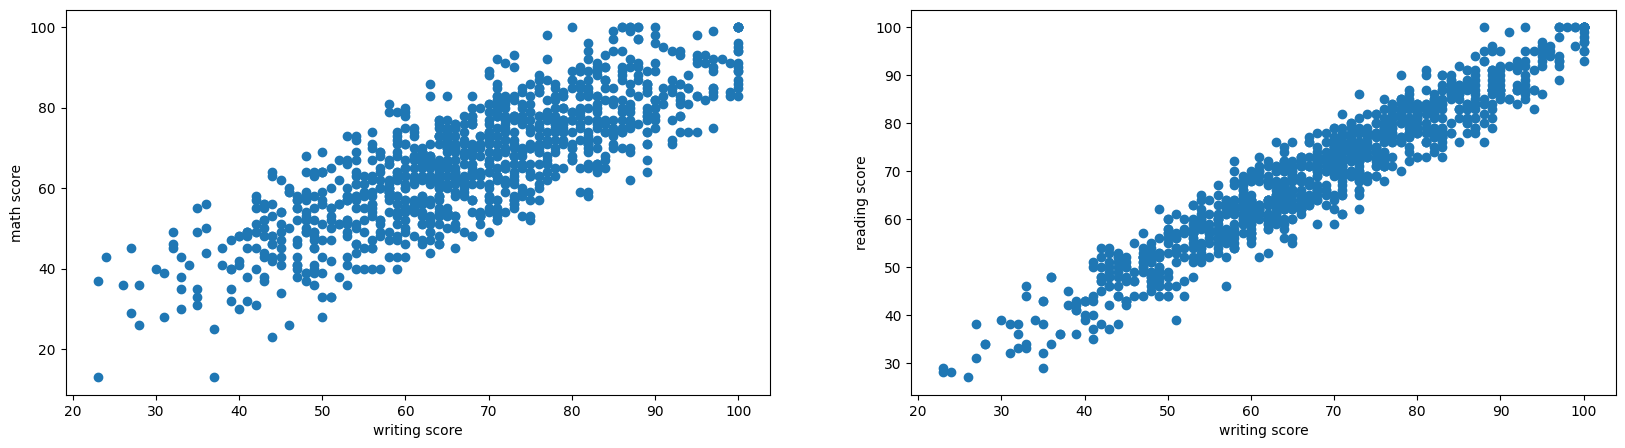

In [40]:
#scatter plot:num vs num
columns = list(num_col.columns) # Get the actual column names from the DataFrame

# We want to plot 'writing score' against 'math score' and 'reading score'
base_column = 'writing score'
# Remove the base column from the list of columns to plot against
columns_to_plot = [col for col in columns if col != base_column]


fig, ax = plt.subplots(1, len(columns_to_plot), figsize = (20, 5))

# Ensure ax is an array even if only one subplot
if len(columns_to_plot) == 1:
    ax = [ax]


for idx, col in enumerate(columns_to_plot, 0):
    # Plot the base column on the x-axis and the current column on the y-axis
    ax[idx].plot(df[base_column], df[col], 'o')
    ax[idx].set_xlabel(base_column)
    ax[idx].set_ylabel(col)

plt.show()

**all  histograms have strong positive relationship, except petal_length with sepal_width is negative weak **

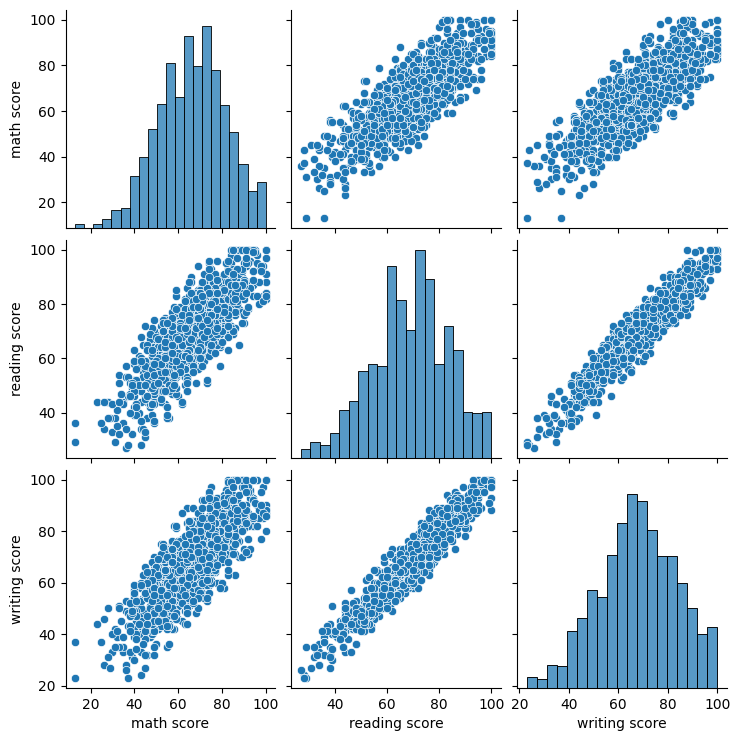

In [41]:
#scatter plot:num vs num
sns.pairplot(df)
plt.show()

comparison between the catagroies of gender colm with each num colm
** where box plot show the outliers,
femLES have higher scores in reading and writting than males but males are smarter in math




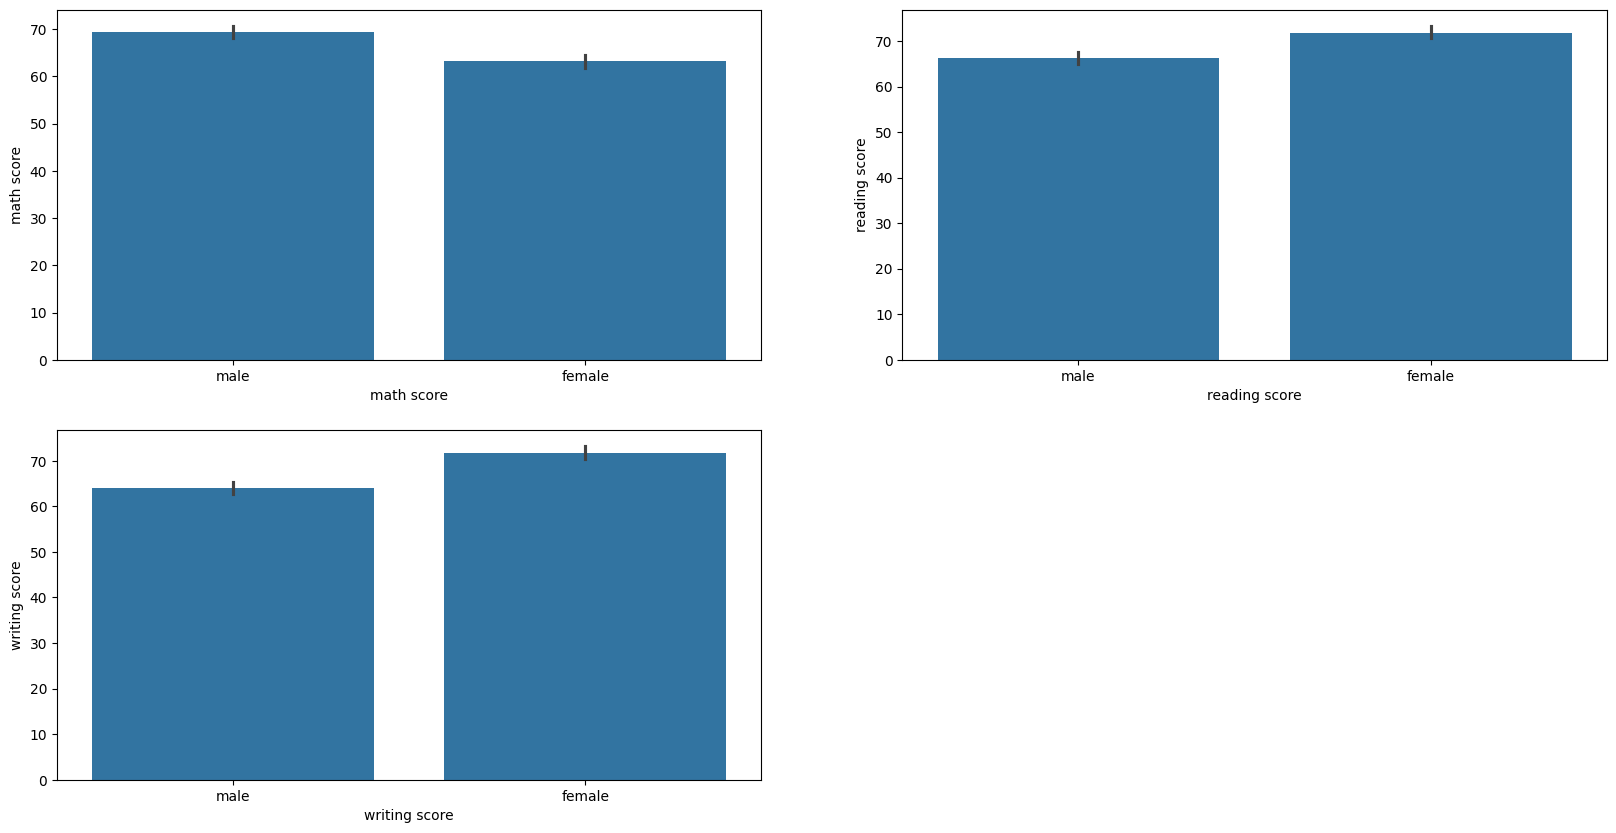

In [43]:
#bar chart:cat vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)

    sns.barplot(x=df['gender'], y=df[col])

    plt.xlabel(f"{col}")
    plt.ylabel(f"{col}")

plt.show()

as we notice that in math all males from each group acheive higher score than females, and in writtting and reading females have higher scores

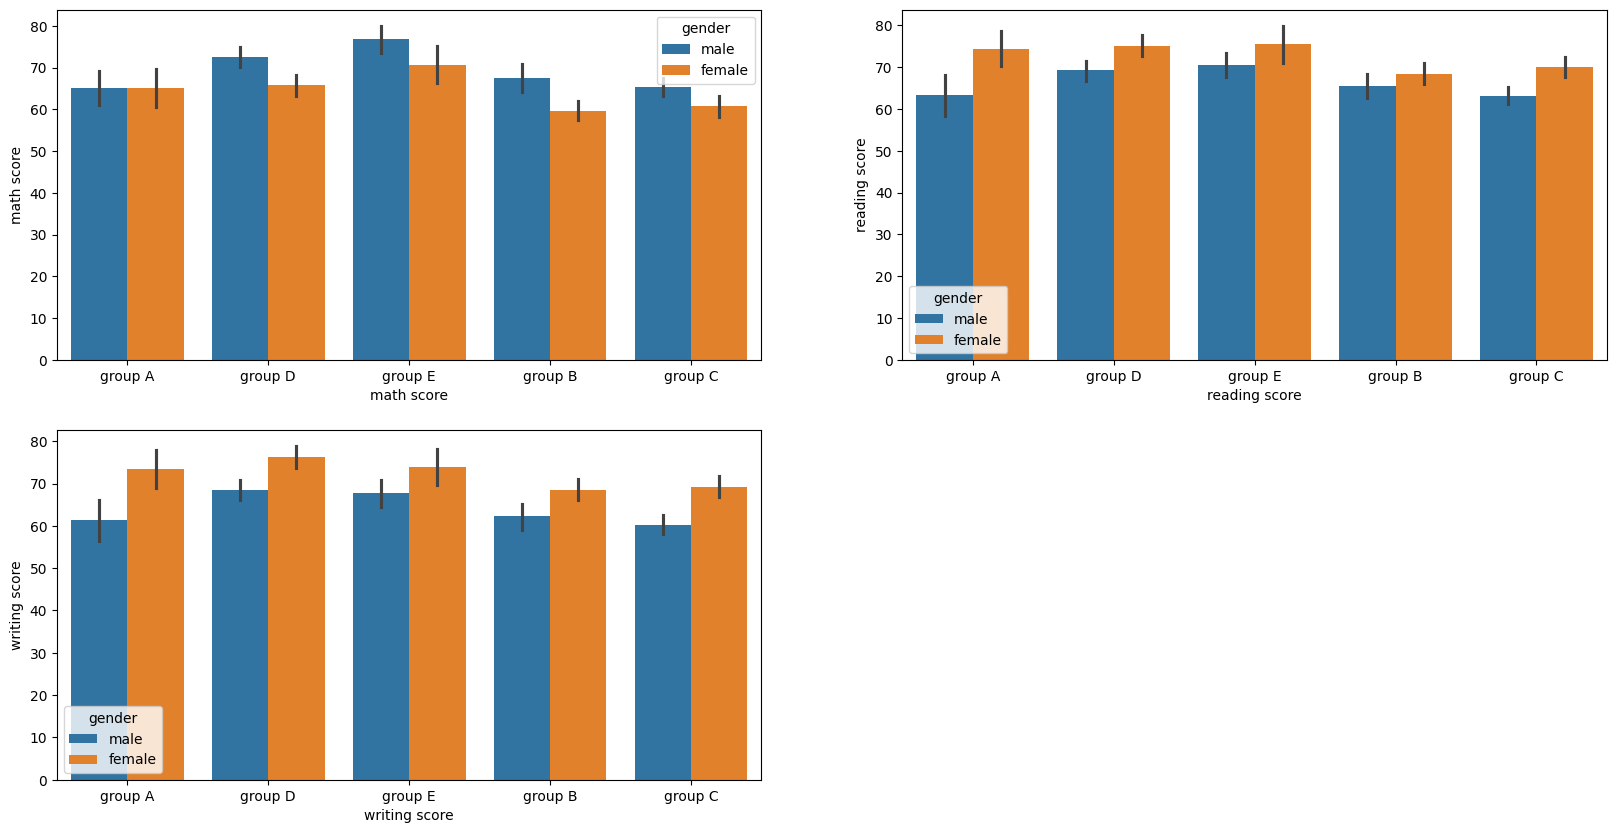

In [45]:
#bar chart:cat vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)

    sns.barplot(x=df['race/ethnicity'], y=df[col],hue=df['gender'])

    plt.xlabel(f"{col}")
    plt.ylabel(f"{col}")

plt.show()

parent level of edu is effcts the score of reading and writting but in math did not, for me i think thats because females almost all time affected by there parents since females have the higher scoes in reading and writting and so level of parents edu effected their academic performance

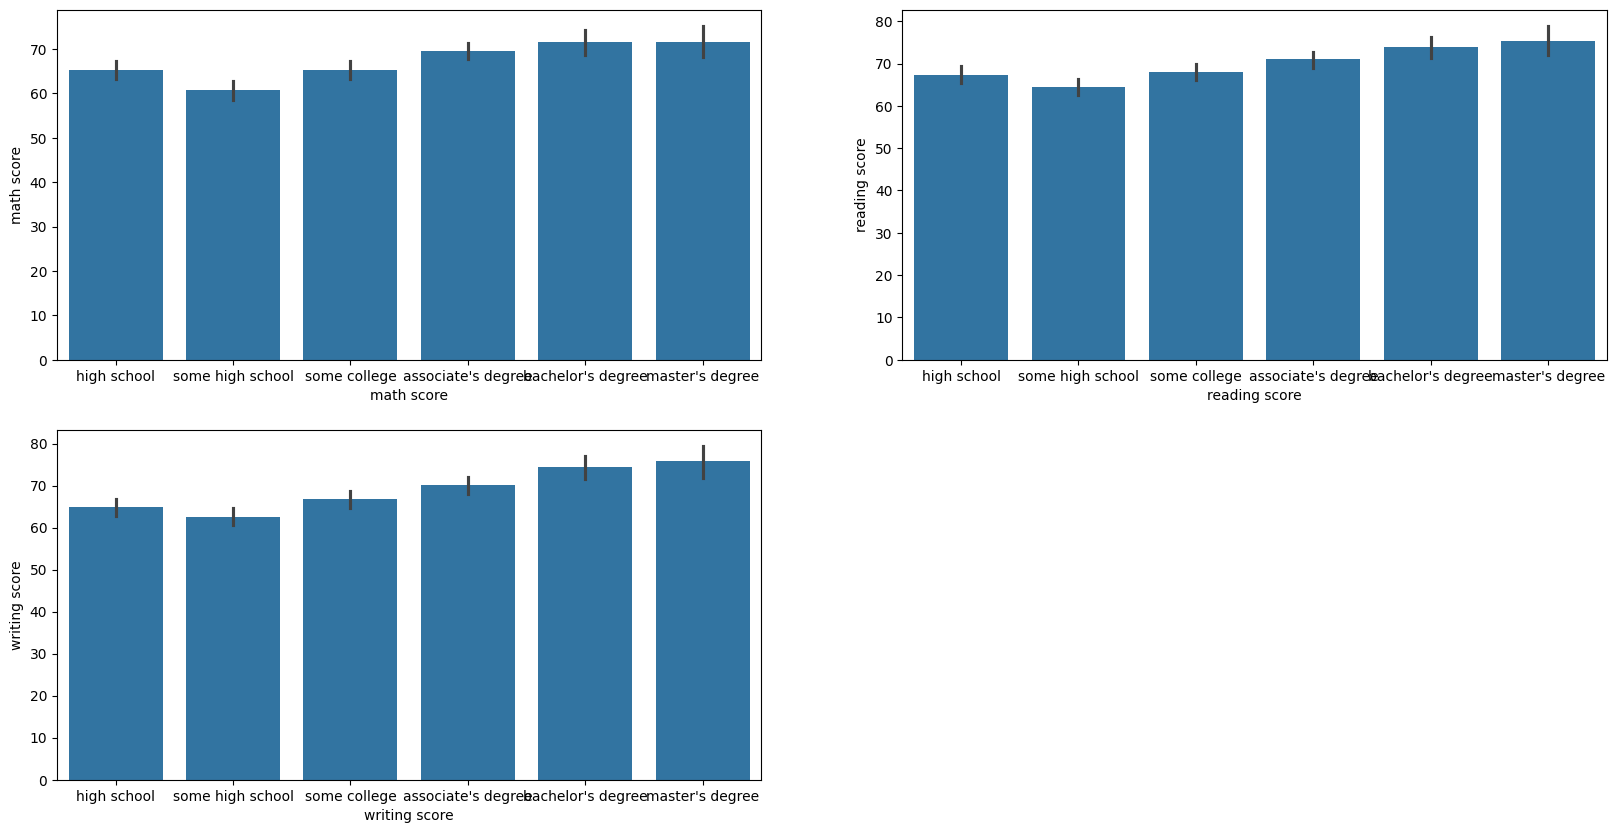

In [52]:
#bar chart:cat vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)

    sns.barplot(x=df['parental level of education'], y=df[col])

    plt.xlabel(f"{col}")
    plt.ylabel(f"{col}")

plt.show()

lunch did not effect the academic performance since the femLES have higher scores in reading and writting than males but males are smarter in math regadless the state of lunch

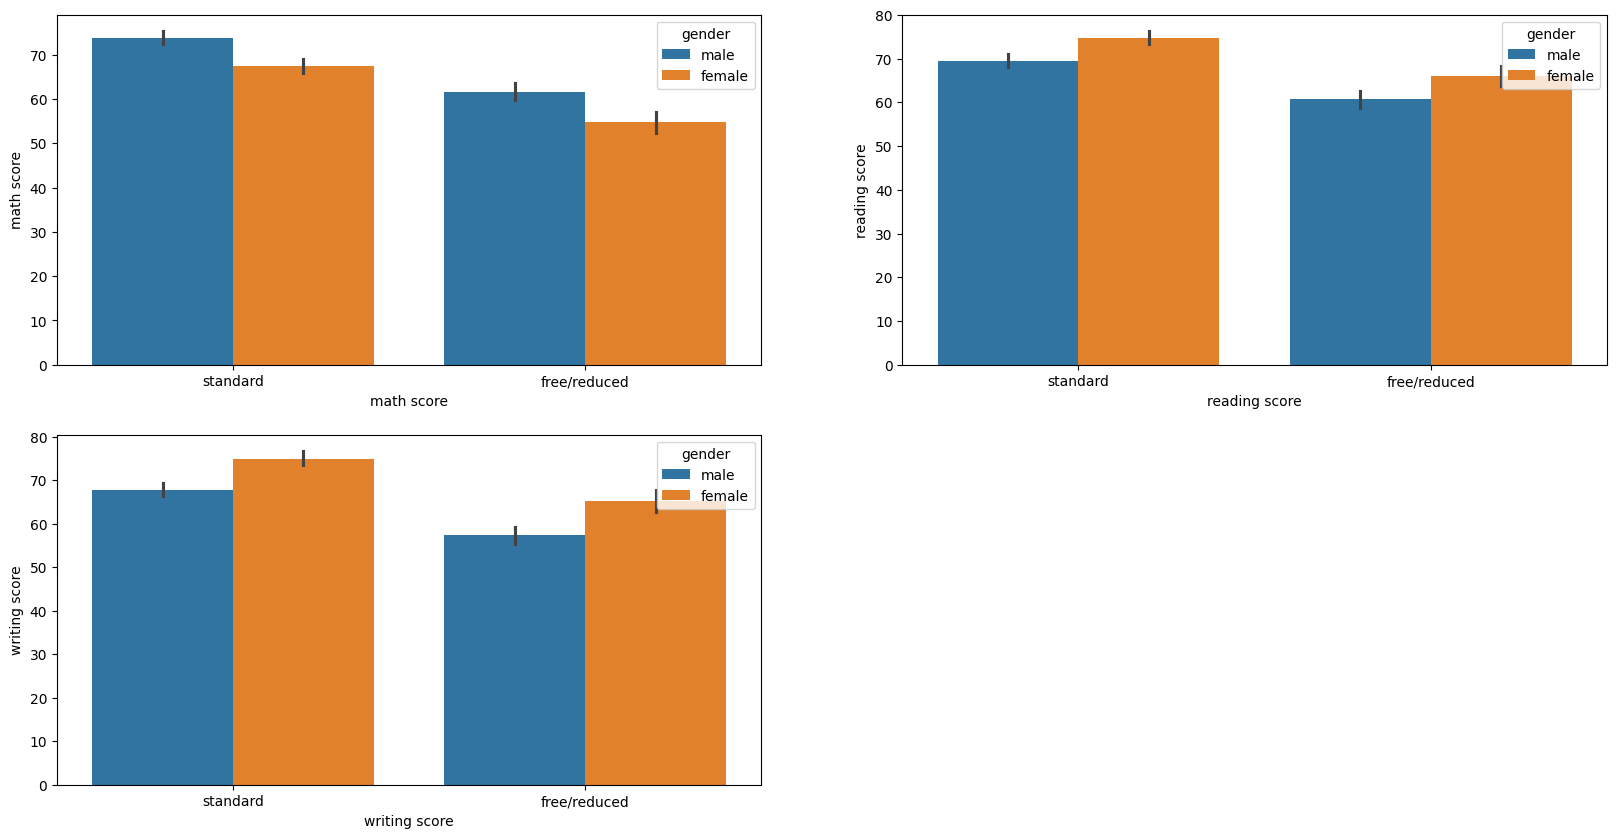

In [53]:
#bar chart:cat vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)

    sns.barplot(x=df['lunch'], y=df[col],hue=df['gender'])

    plt.xlabel(f"{col}")
    plt.ylabel(f"{col}")

plt.show()

test preperation coure did not effect the academic perforamnce of each gender since the femLES have higher scores in reading and writting than males but males are smarter in math regadless the state of test prep completed or not

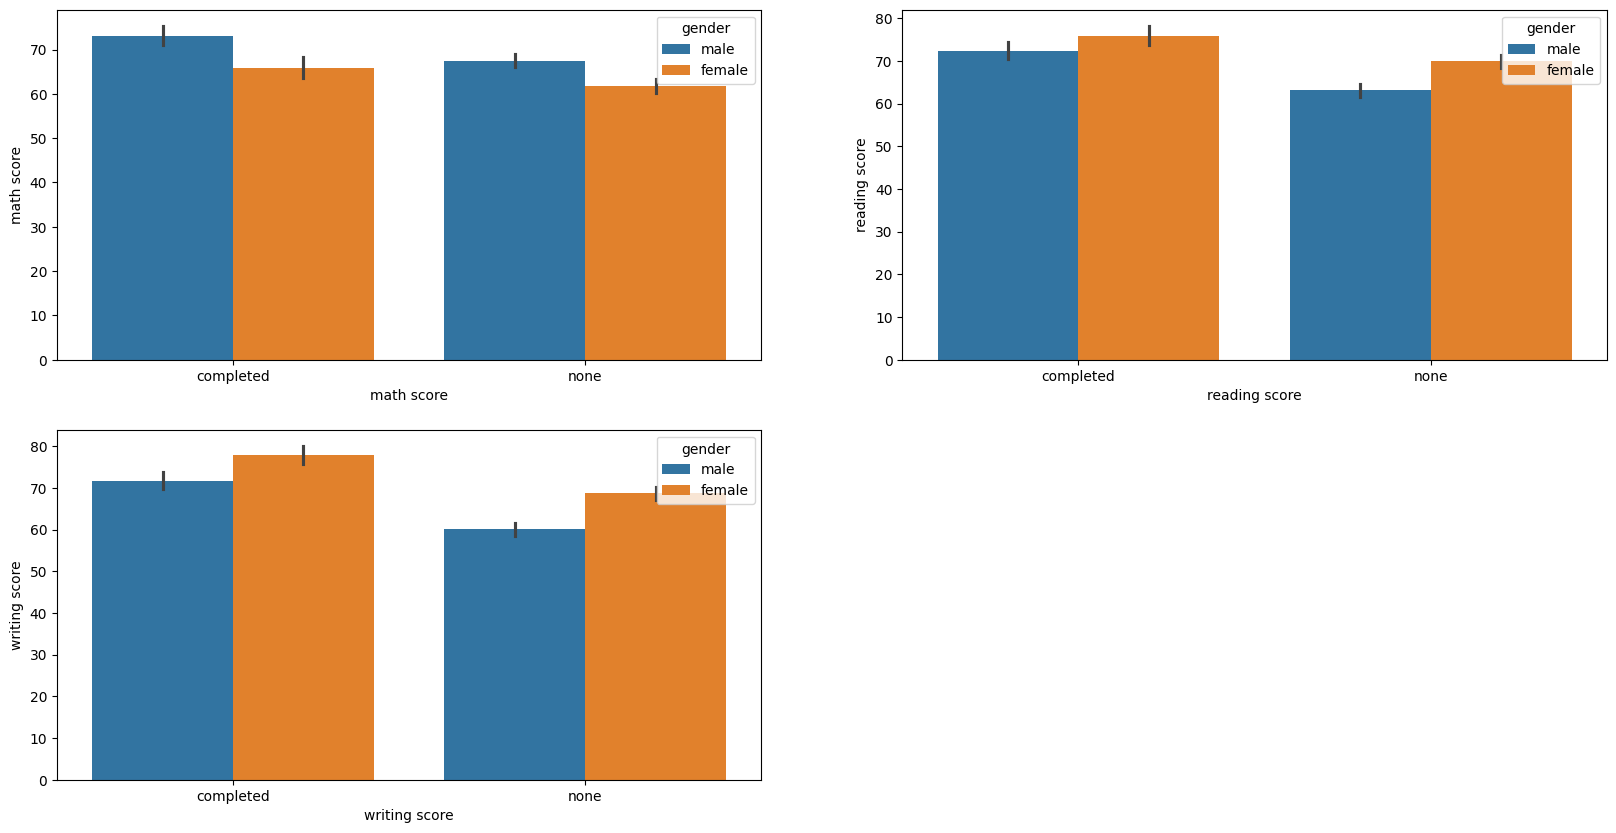

In [54]:
#bar chart:cat vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)

    sns.barplot(x=df['test preparation course'], y=df[col],hue=df['gender'])

    plt.xlabel(f"{col}")
    plt.ylabel(f"{col}")

plt.show()

## Multivariate Analysis

heat map used to discover the relationship between all num variables

1.   all three varaibles have strong positive relationship

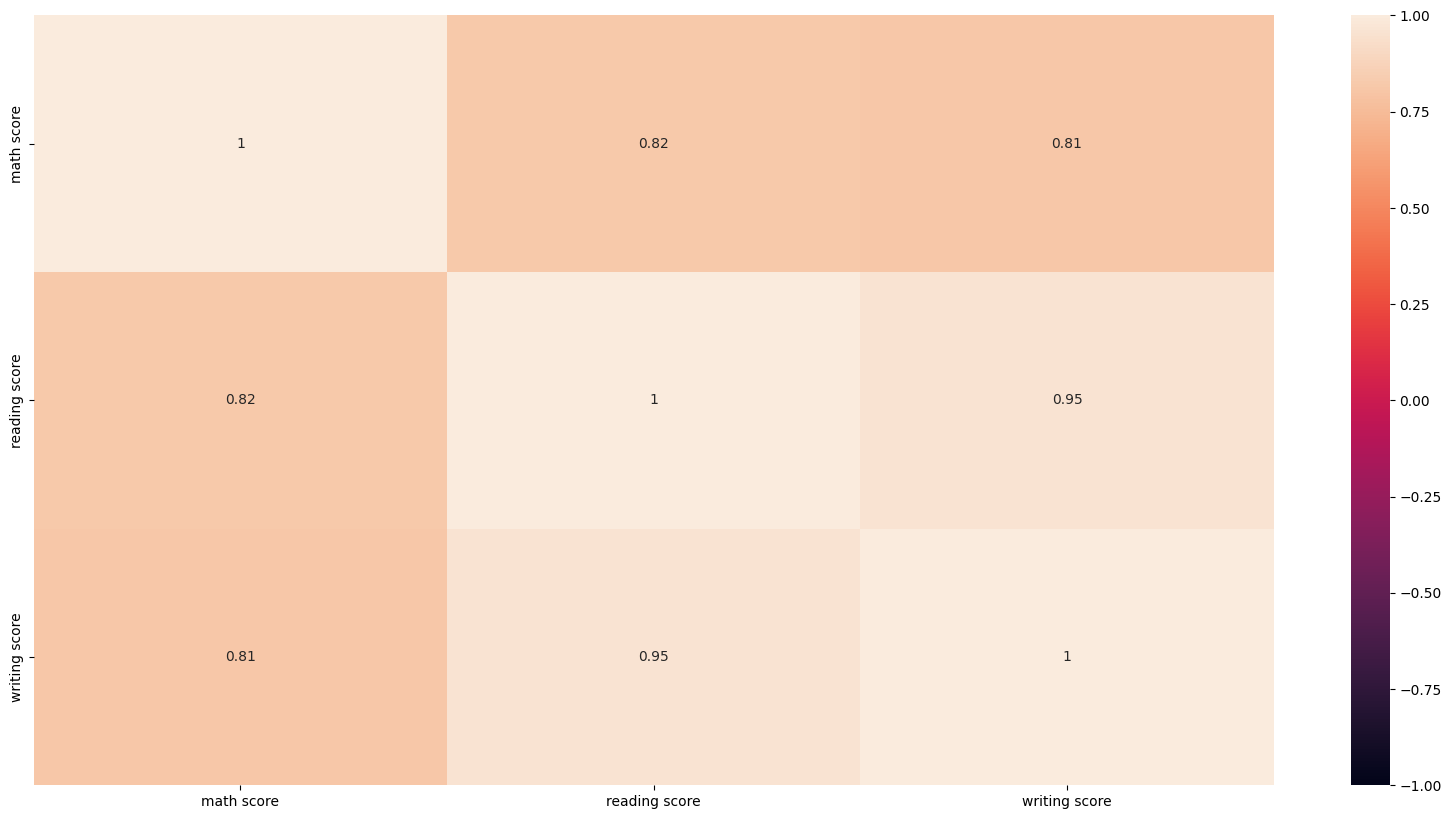

In [56]:
plt.figure(figsize= (20, 10))
sns.heatmap(data= df.drop(cat_col, axis= 1).corr(), annot= True,vmin=-1,vmax=1)
plt.show()

In [55]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000
